In [63]:
import numpy as np
import h5py
import os
from datetime import datetime

hdf5_dir = 'BBBC021/data/hdf5'
image_df = pd.read_csv(os.path.join('BBBC021/data/raw', 'BBBC021_v1_image.csv'))
n_images = len(image_df)

with h5py.File(os.path.join(hdf5_dir, os.listdir(hdf5_dir)[0]), 'r') as h5_file:
    datasets = {
        x: [h5_file[x].shape, h5_file[x].dtype]
        for x in list(h5_file.keys())
    }

layouts = {
    x: h5py.VirtualLayout(shape=(n_images,) + shape[1:], dtype=dtype)
    for x, (shape, dtype) in datasets.items()
}

for i, filename in enumerate(os.listdir(hdf5_dir)[:3]):
    file_path = os.path.join(hdf5_dir, filename)
    for d, (s, _) in datasets.items():
        layouts[d][i*s[0]:(i+1)*s[0]] = h5py.VirtualSource(file_path, d, s)
        
with h5py.File("bbbc021.h5", "w") as h5_file:
    h5_file.attrs['timestamp'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    h5_file.attrs['h5py_info'] = h5py.version.info
    for name, layout in layouts.items():
        h5_file.create_virtual_dataset(name, layout)

4
G11
3
Week4_27542
DMSO
0.0
DMSO
float32 (3, 1024, 1280) 0.005317769 0.008667124435305595 0.16113527119159698 0.40430304


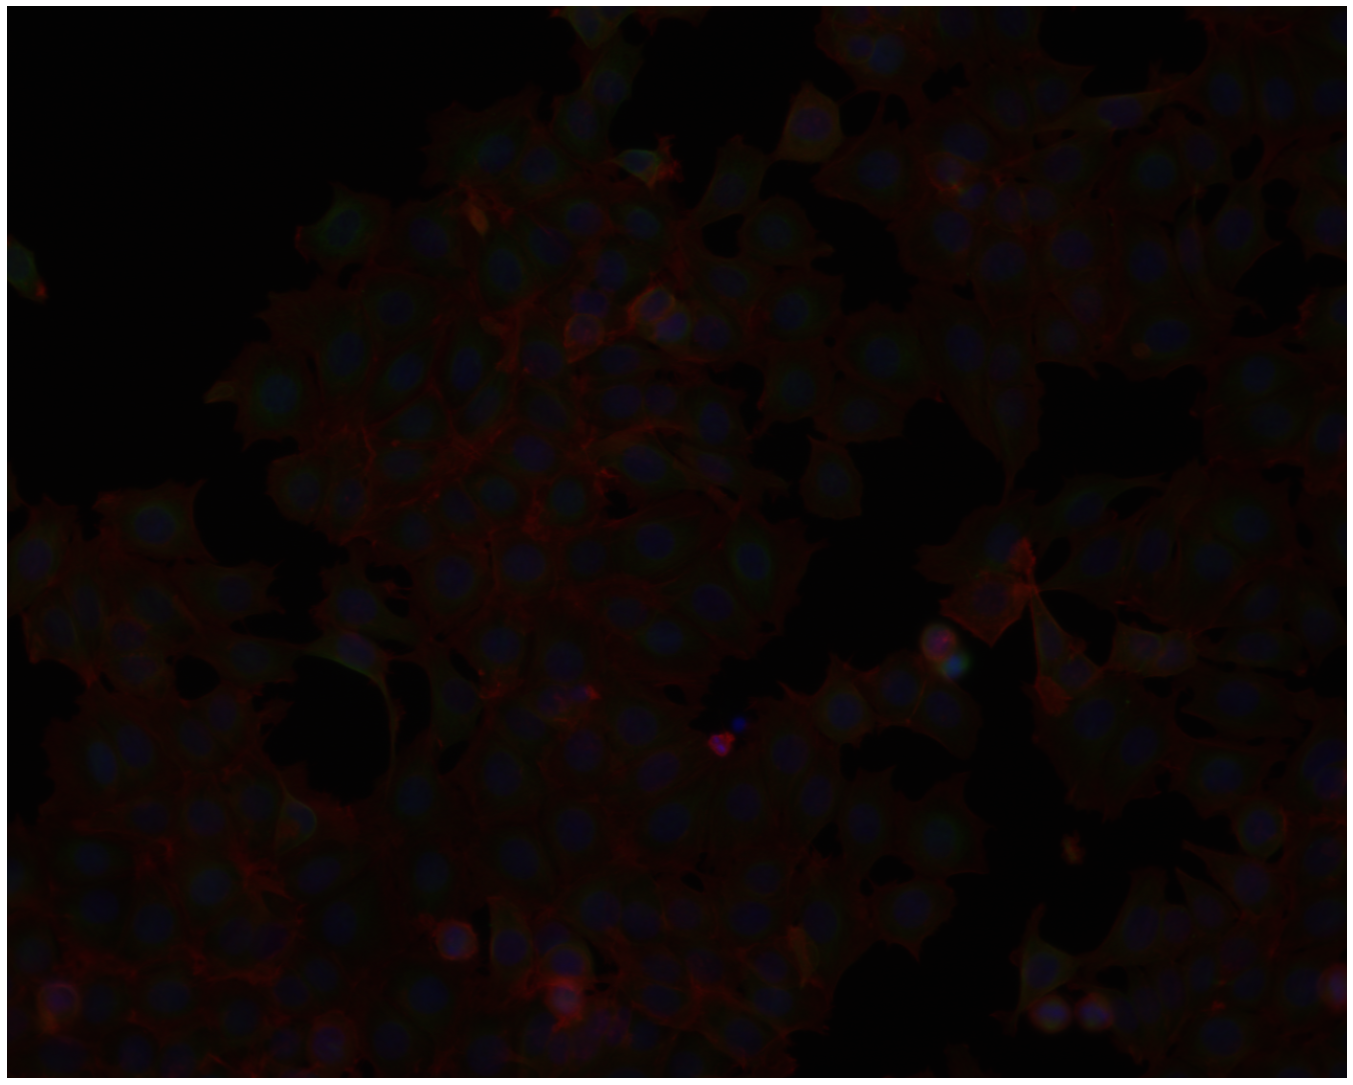

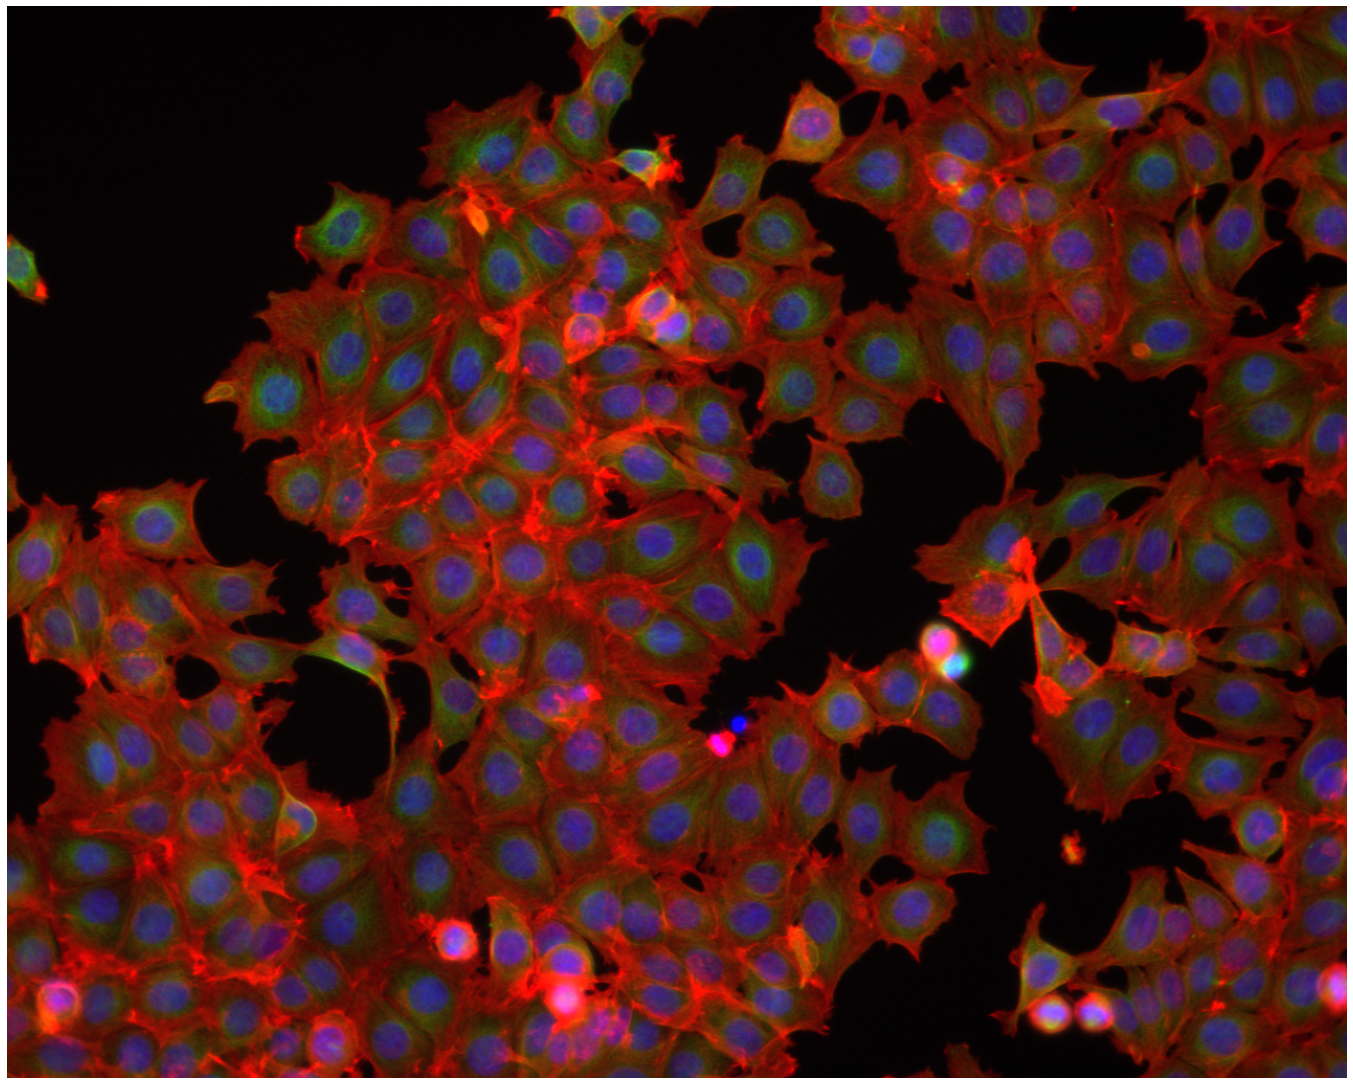

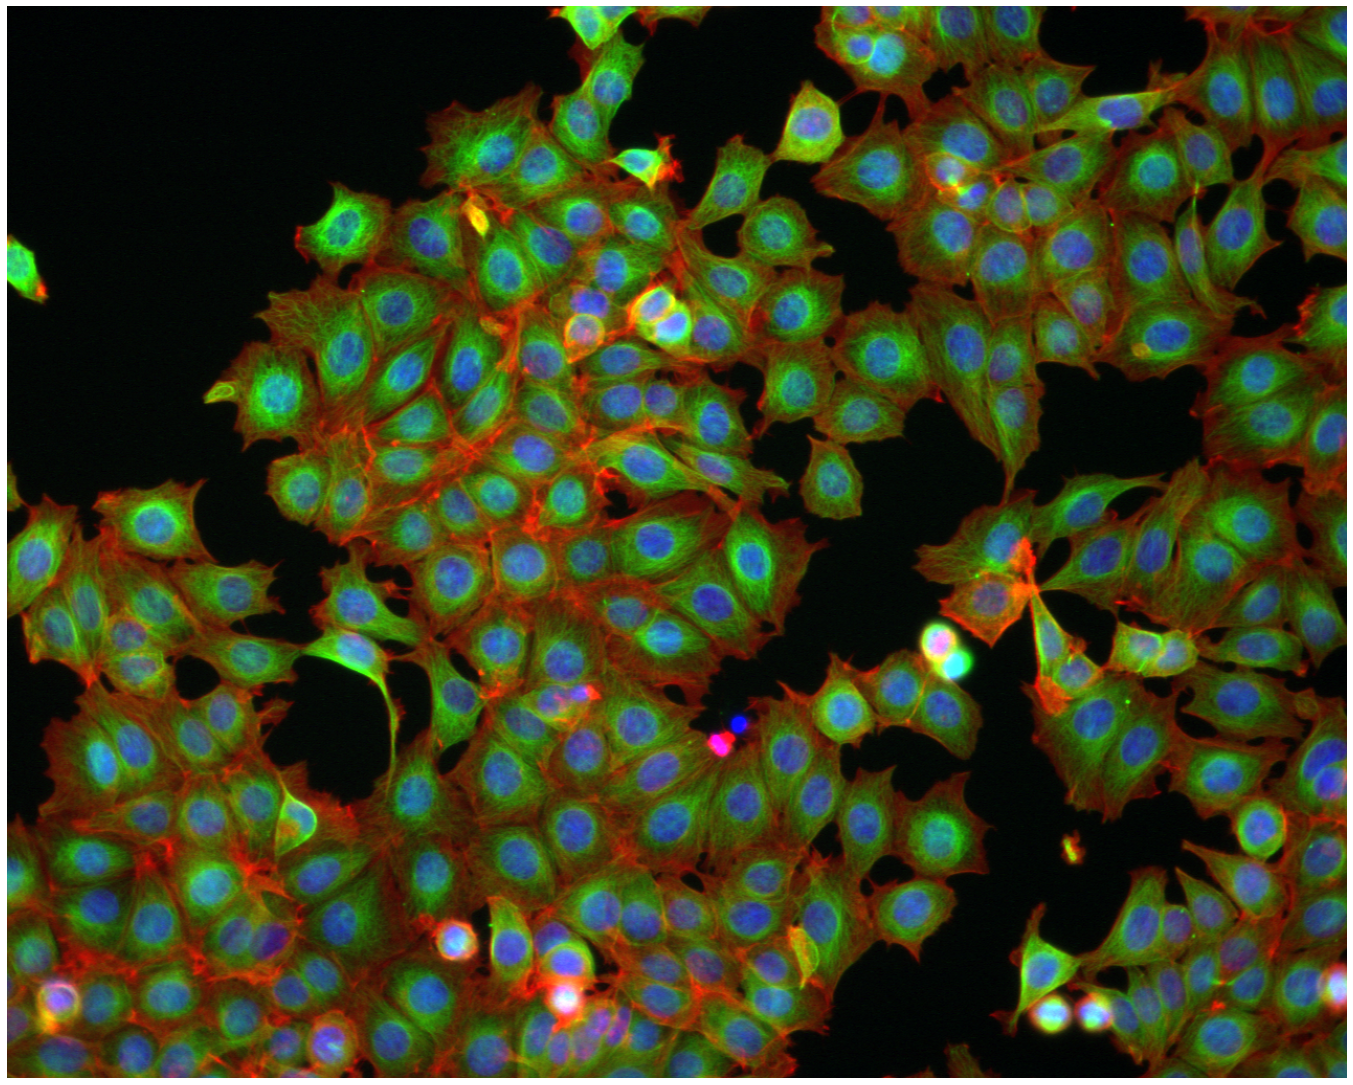

In [65]:
import matplotlib.pyplot as plt
with h5py.File("bbbc021.h5", "r") as h5_file:
    i = 719
    print(h5_file['site'][i])
    print(h5_file['well'][i])
    print(h5_file['replicate'][i])
    print(h5_file['plate'][i])
    print(h5_file['compound'][i])
    print(h5_file['concentration'][i])
    print(h5_file['moa'][i])
    img = h5_file['images'][i]
    img = img.astype(np.float32) / 65535
    print(img.dtype, img.shape, img.min(), np.percentile(img, 0.2), np.percentile(img, 99.8), img.max())
    
    plt.figure(figsize=(24, 20))
    plt.imshow(np.moveaxis(img, 0, 2))
    plt.axis('off')
    plt.show()
    
    new_img = (img - np.percentile(img, 0.2)) / (np.percentile(img, 99.8) - np.percentile(img, 0.2))
    new_img = np.clip(new_img, 0, 1)
    
    plt.figure(figsize=(24, 20))
    plt.imshow(np.moveaxis(new_img, 0, 2))
    plt.axis('off')
    plt.show()
    
    new_img = img
    for c in range(3):
        new_img[c] = (img[c] - np.percentile(img[c], 0.2)) / (np.percentile(img[c], 99.8) - np.percentile(img[c], 0.2))
    new_img = np.clip(new_img, 0, 1)
    
    plt.figure(figsize=(24, 20))
    plt.imshow(np.moveaxis(new_img, 0, 2))
    plt.axis('off')
    plt.show()

In [68]:
import PIL.features

In [82]:
img = np.load('BBBC021/data/illumination_correction/Week2_24121/Actin_s1_illumination.npy')

In [94]:
img.dtype, img.min()

(dtype('float16'), 1.0)

In [84]:
from PIL import Image

In [85]:
pil_img = Image.fromarray(img.astype(np.uint16))

In [86]:
pil_img.save('test.tiff')

In [95]:
pil_img = np.asarray(Image.open('test.tiff'))

In [97]:
pil_img.dtype, pil_img.min(), pil_img.max()

(dtype('uint16'), 1, 1)

In [90]:
plt.imshow(img.astype(np.float32))
plt.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [114]:
class Dataset:
    def __init__(self, l):
        self.data = l
        
    def __getitem__(self, index):
        return self.data[index]
        
    def __len__(self):
        return len(self.l)
        

In [115]:
dataset = Dataset(range(20))

In [116]:
dataset[1]

1

In [117]:
dataset.__doc__

In [121]:
hash('ciao')

-8566466686281234172